In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
d=pd.read_csv('Income Dataset.csv')
d

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
d1=d[['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']]

In [6]:
d2=d[['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']]

In [7]:
d.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
d.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,41459,43957,43957,41451,43957,43957,43957,43194
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,30587,14197,20147,5519,17749,37572,29400,39429


### EDA

<Axes: xlabel='age', ylabel='Count'>

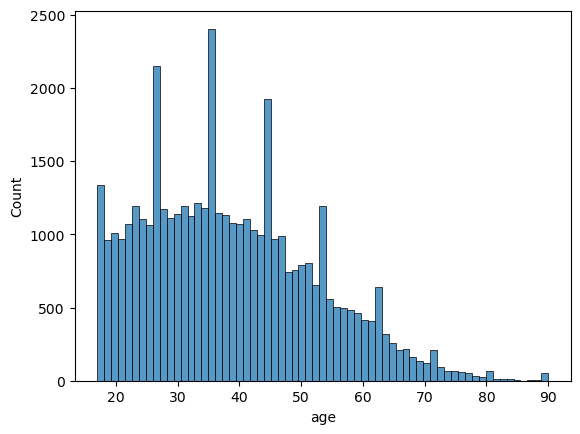

In [9]:
sns.histplot(x='age', data=d)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

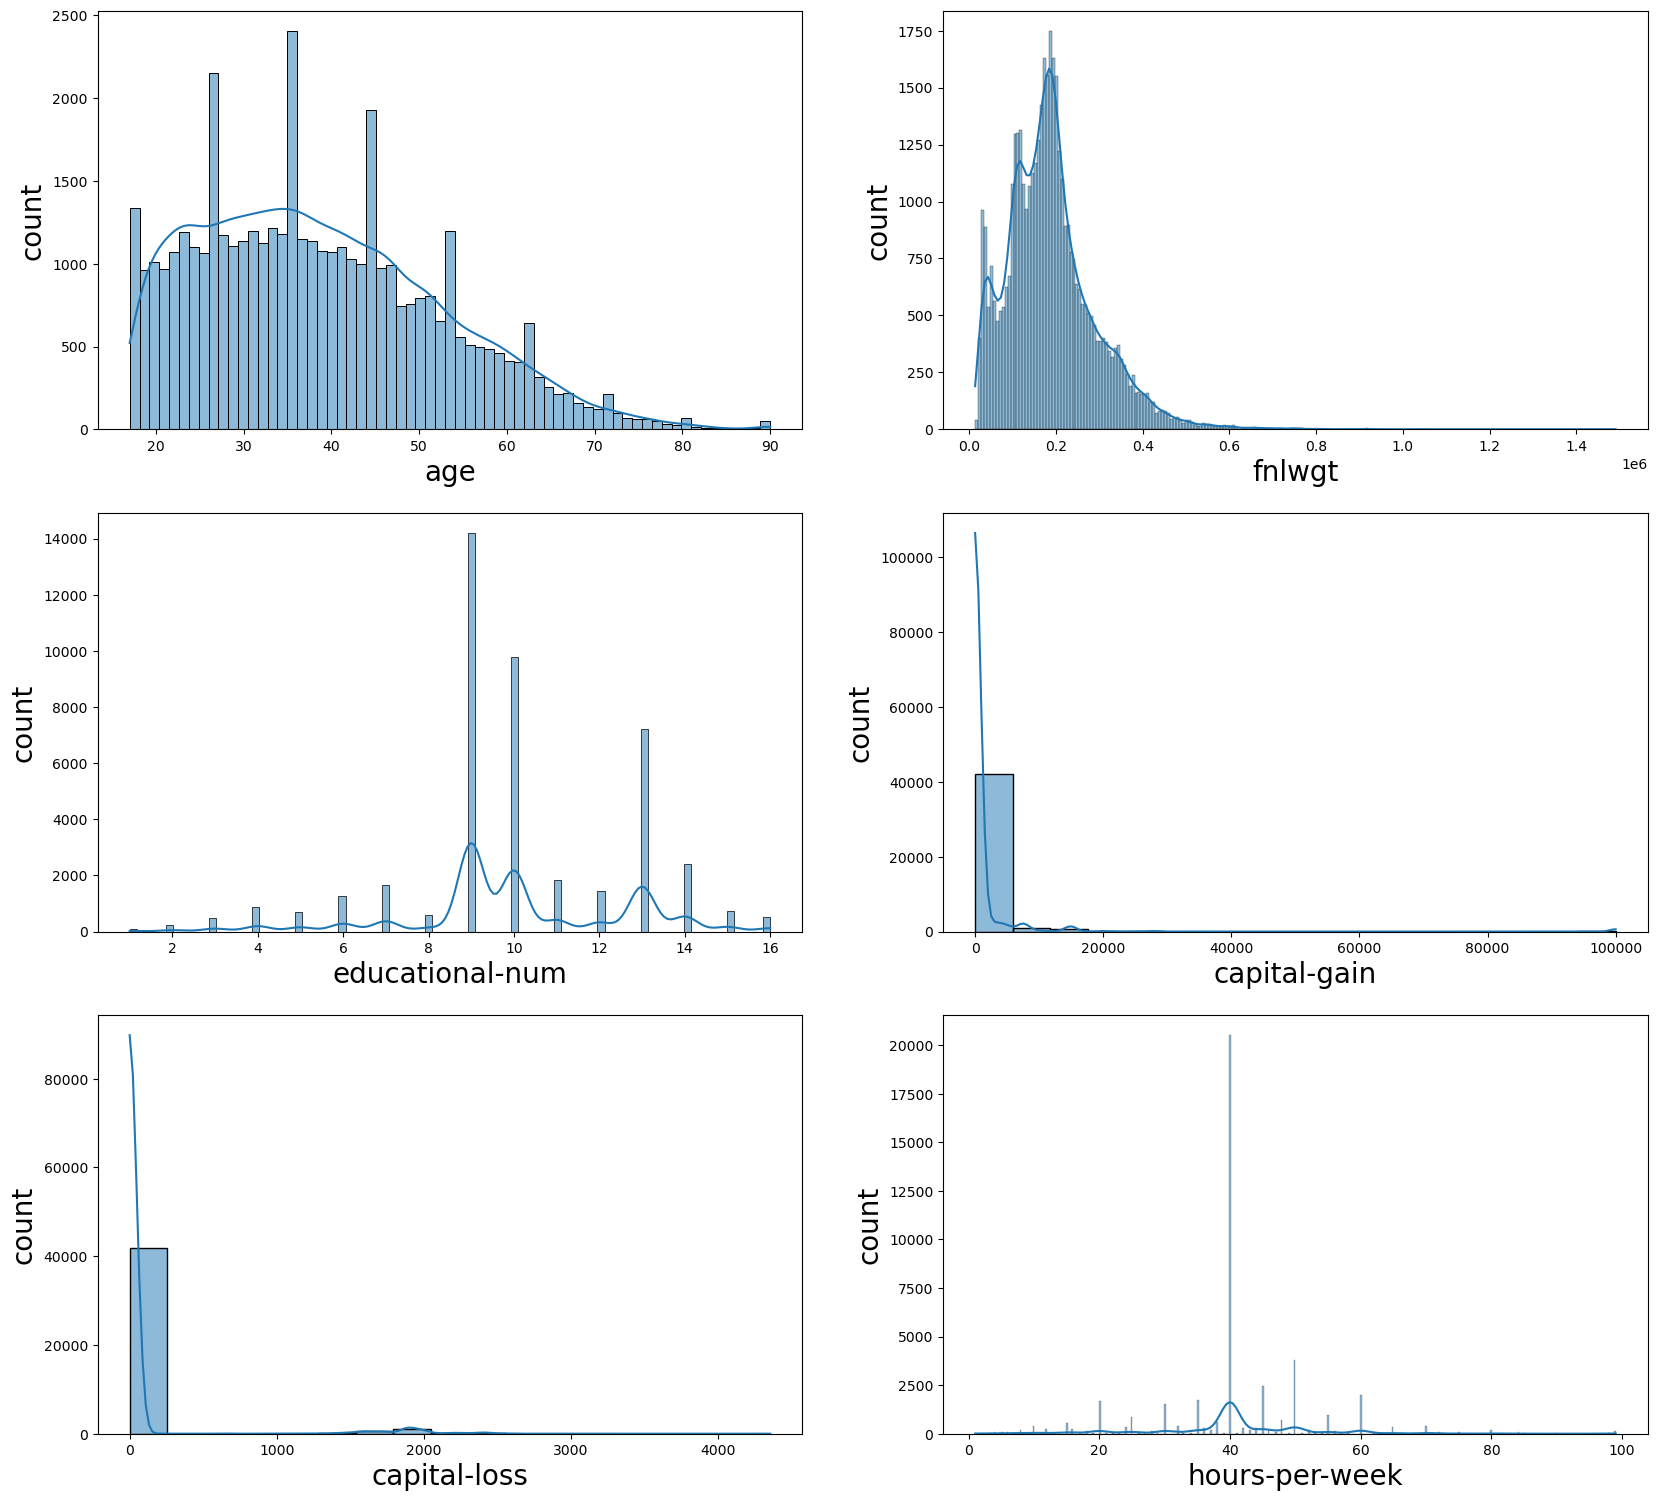

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d1:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.histplot(d[col],kde=True)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

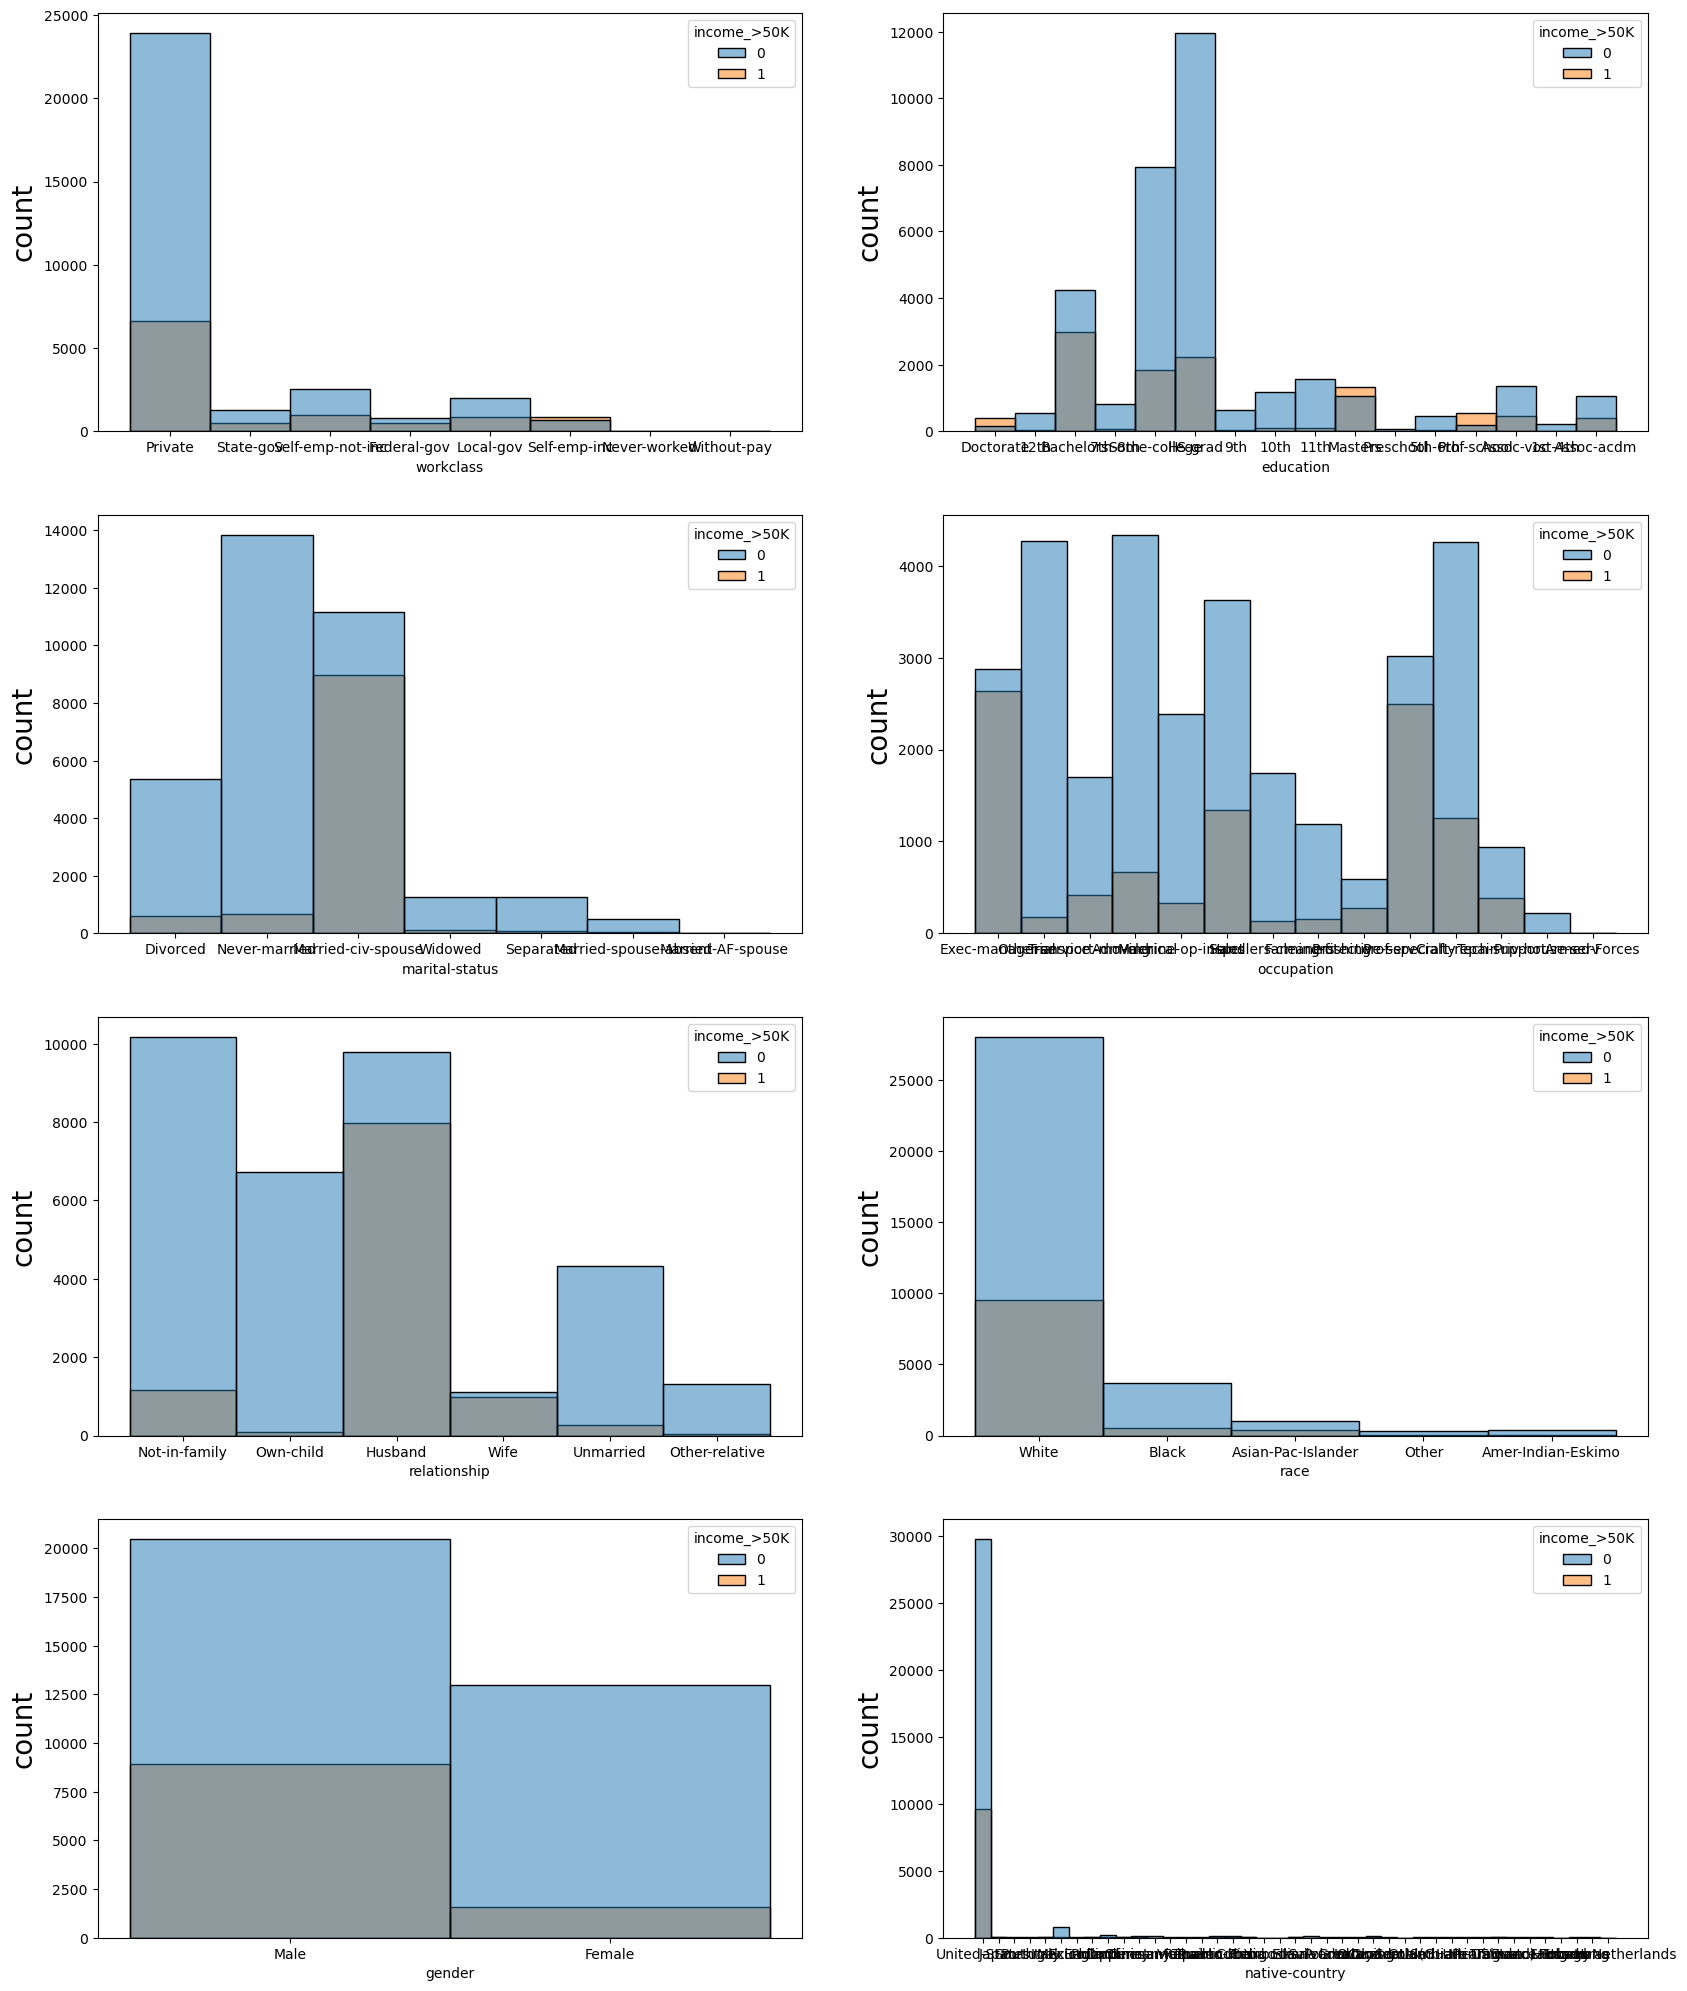

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d2:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.histplot(x=d[col],hue=d['income_>50K'])
        plt.xlabel(col, fontsize=10)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout


KeyboardInterrupt



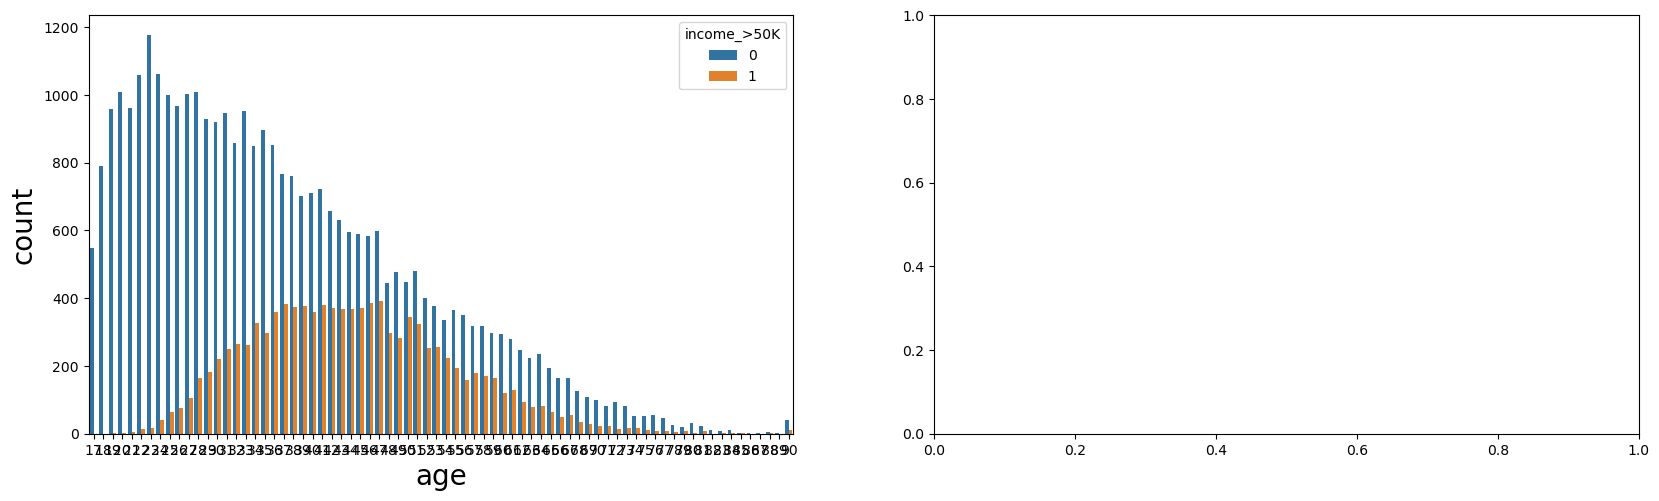

In [12]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d1:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.countplot(x=d[col],hue=d['income_>50K'])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

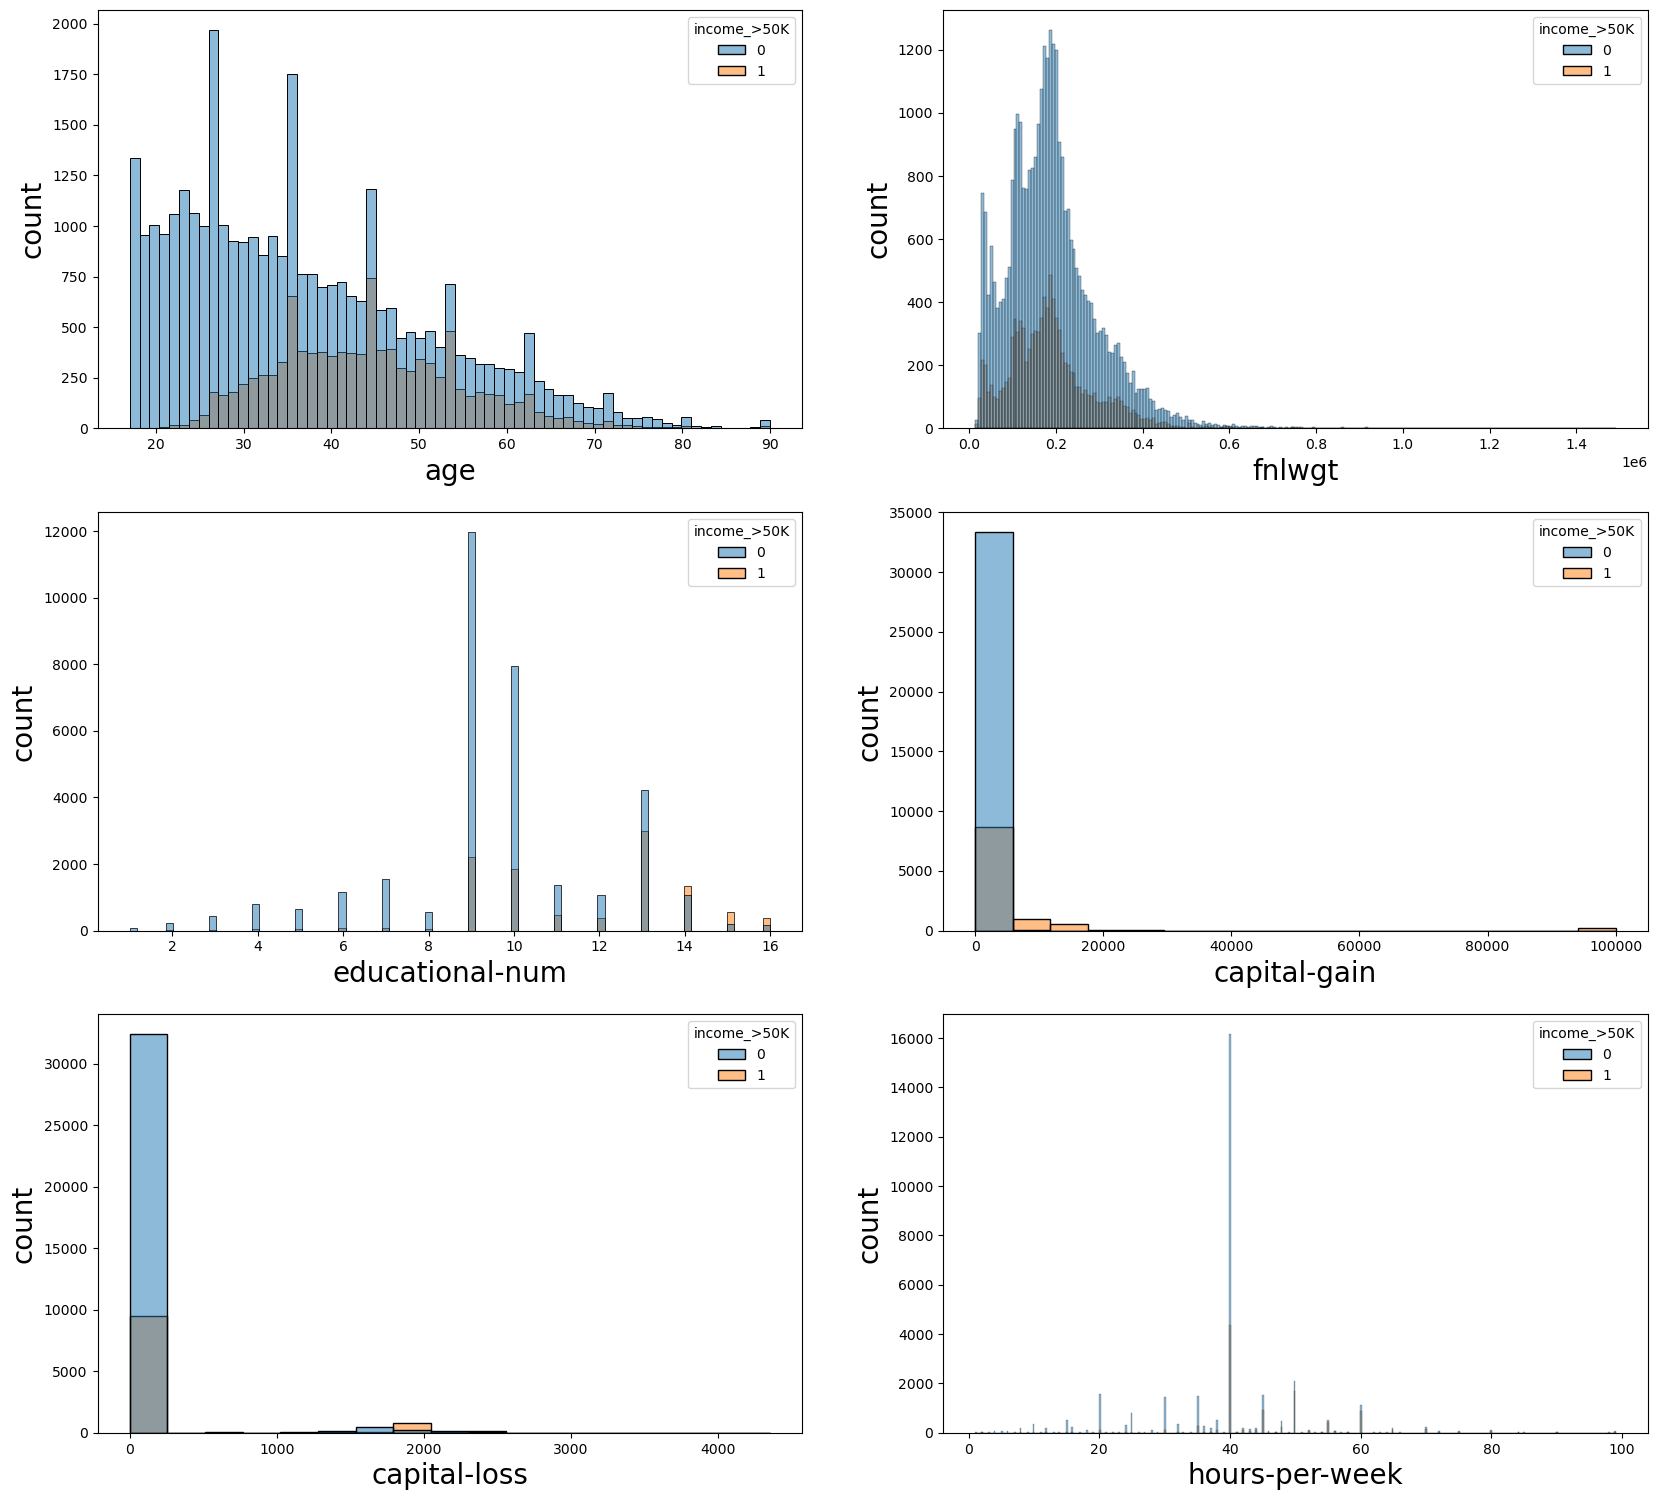

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d1:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.histplot(x=d[col],hue=d['income_>50K'])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

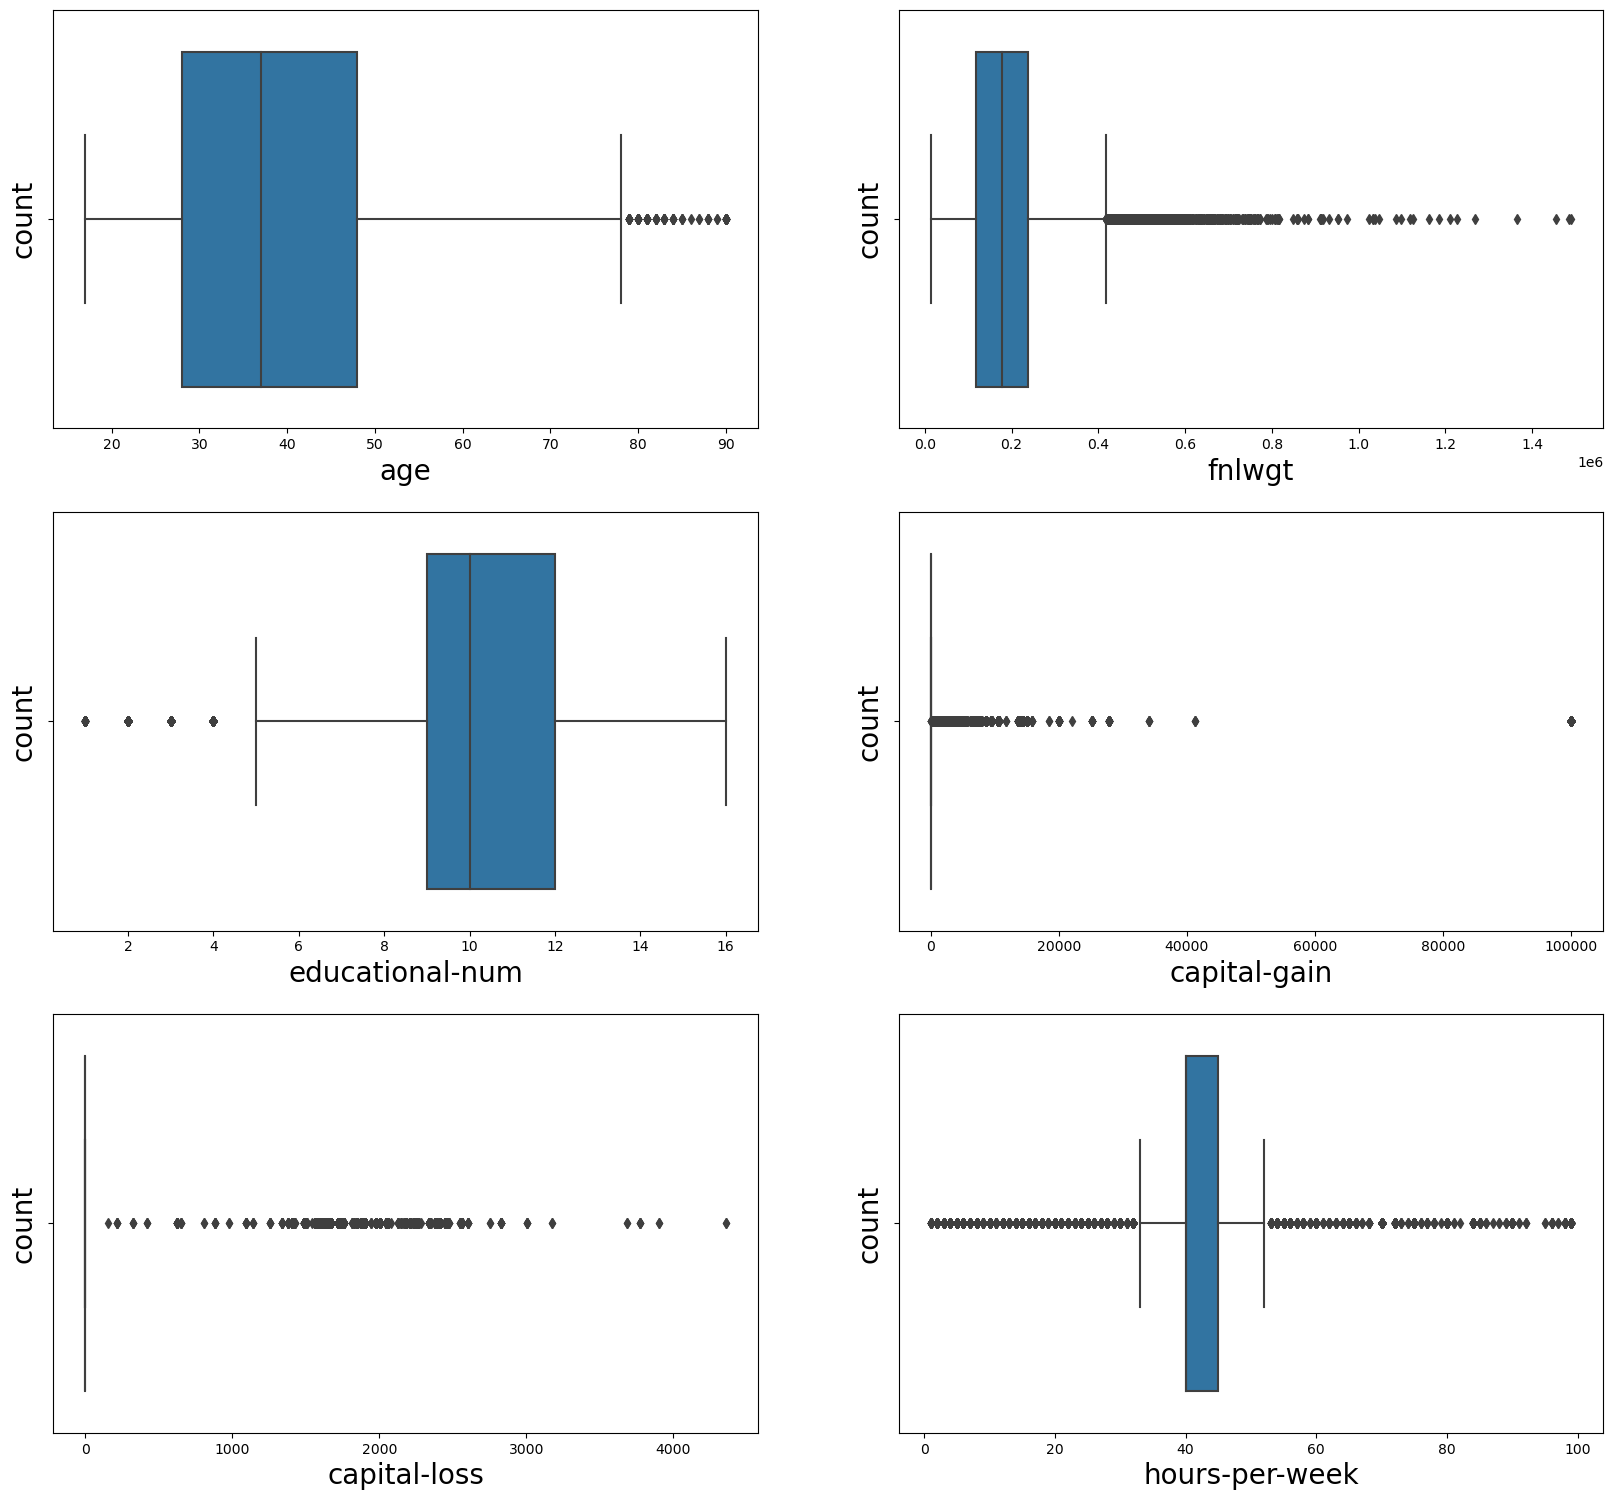

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d1:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.boxplot(x=d[col],hue=d['income_>50K'])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

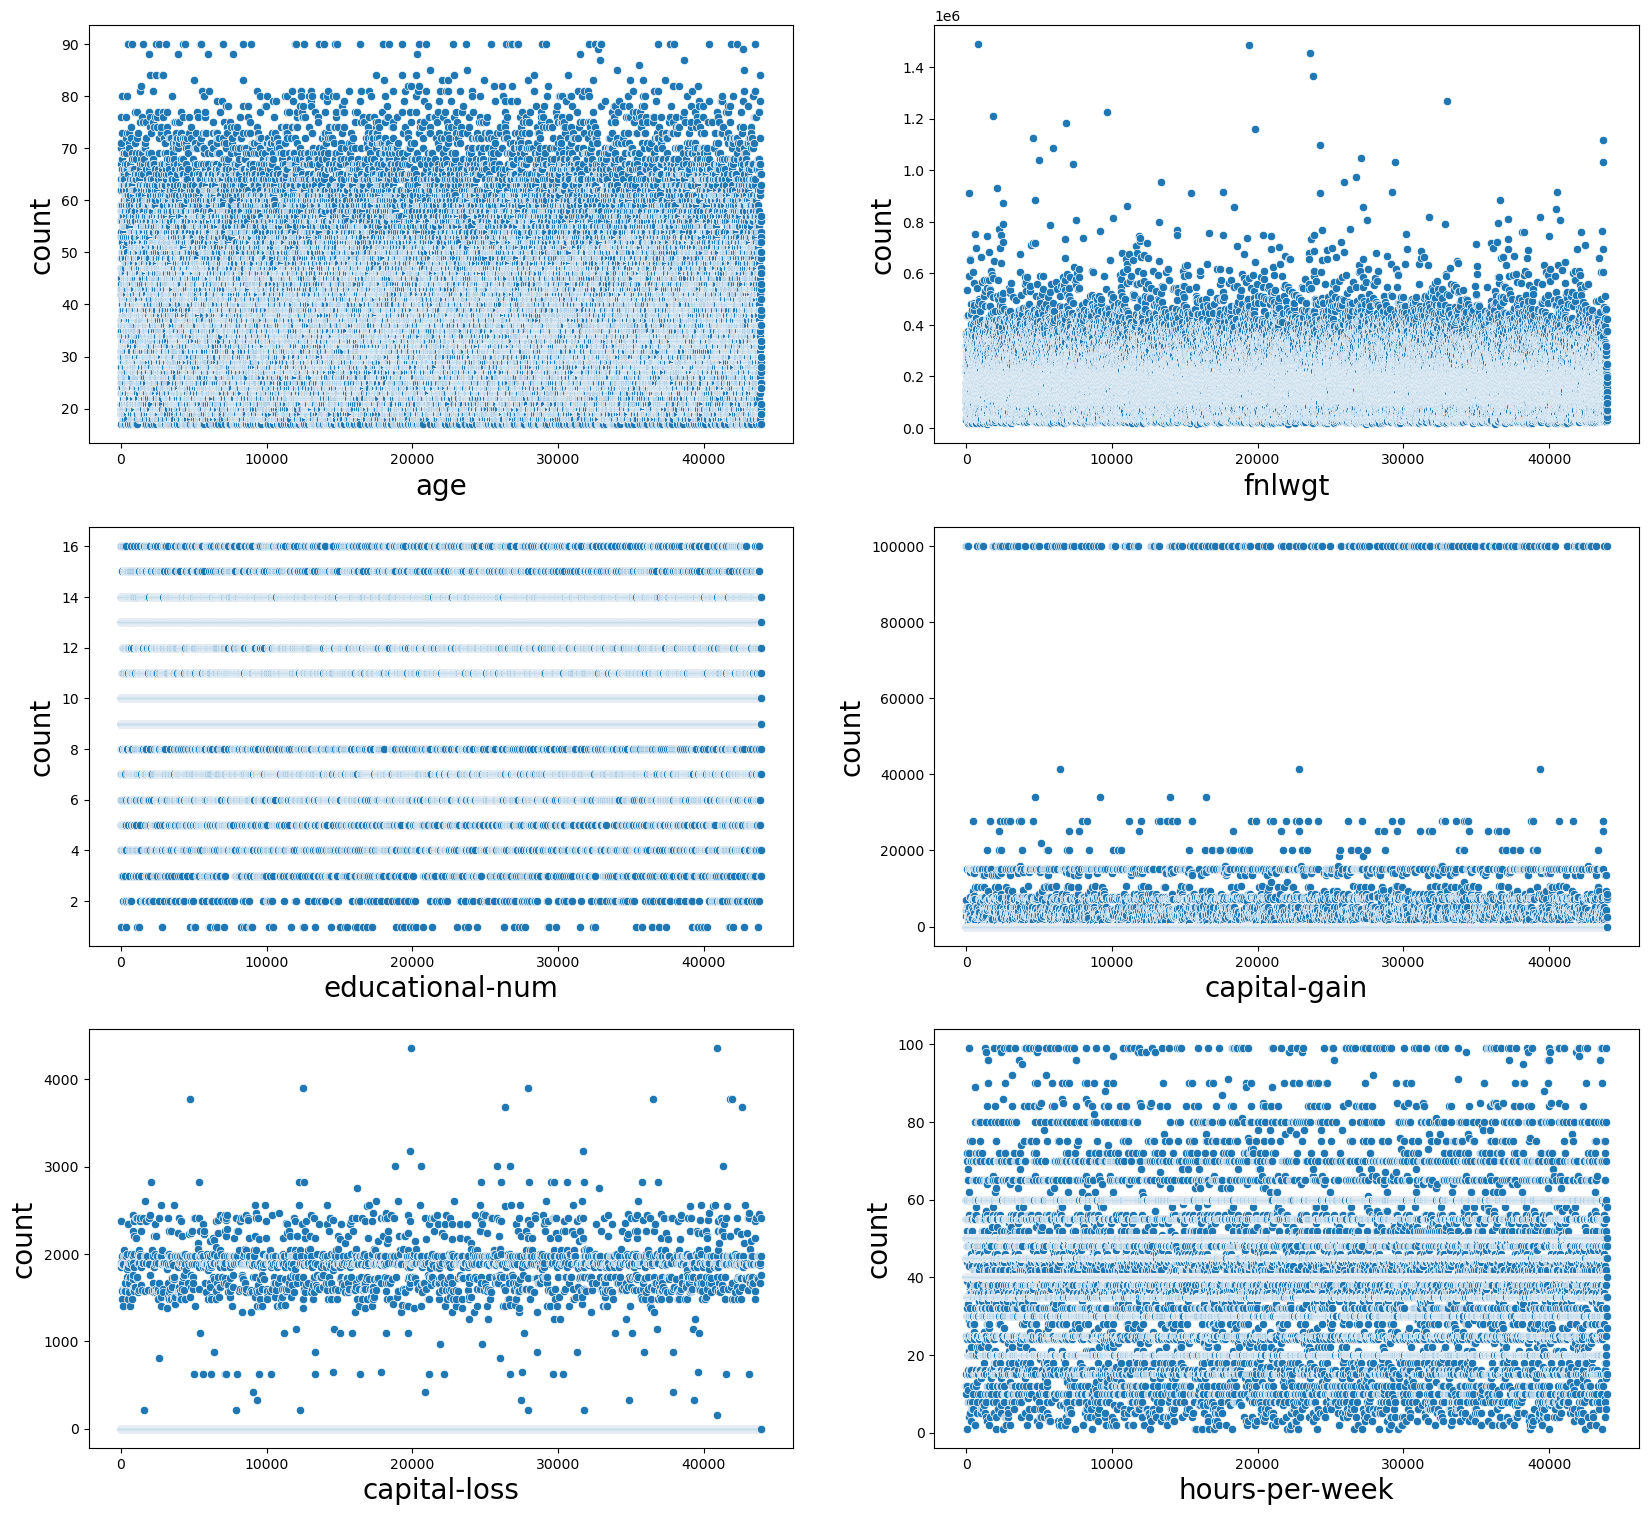

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plot=1
for col in d1:
    if plot <=10:
        ax=plt.subplot(4,2,plot)
        sns.scatterplot(d[col])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('count', fontsize=20)
    plot+=1
plt.tight_layout

In [15]:
d.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
d['workclass']=lr.fit_transform(d['workclass'])
d['education']=lr.fit_transform(d['education'])
d['marital-status']=lr.fit_transform(d['marital-status'])
d['occupation']=lr.fit_transform(d['occupation'])
d['relationship']=lr.fit_transform(d['relationship'])
d['race']=lr.fit_transform(d['race'])
d['native-country']=lr.fit_transform(d['native-country'])
d['gender']=lr.fit_transform(d['gender'])


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              43957 non-null  int64
 1   workclass        43957 non-null  int32
 2   fnlwgt           43957 non-null  int64
 3   education        43957 non-null  int32
 4   educational-num  43957 non-null  int64
 5   marital-status   43957 non-null  int32
 6   occupation       43957 non-null  int32
 7   relationship     43957 non-null  int32
 8   race             43957 non-null  int32
 9   gender           43957 non-null  int32
 10  capital-gain     43957 non-null  int64
 11  capital-loss     43957 non-null  int64
 12  hours-per-week   43957 non-null  int64
 13  native-country   43957 non-null  int32
 14  income_>50K      43957 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 3.7 MB


In [13]:
d.loc[d['workclass'].isnull()==True]="Private"
d.loc[d['occupation'].isnull()==True]='Craft-repair'
d.loc[d['native-country'].isnull()==True]='United-States'

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              43957 non-null  int64
 1   workclass        43957 non-null  int32
 2   fnlwgt           43957 non-null  int64
 3   education        43957 non-null  int32
 4   educational-num  43957 non-null  int64
 5   marital-status   43957 non-null  int32
 6   occupation       43957 non-null  int32
 7   relationship     43957 non-null  int32
 8   race             43957 non-null  int32
 9   gender           43957 non-null  int32
 10  capital-gain     43957 non-null  int64
 11  capital-loss     43957 non-null  int64
 12  hours-per-week   43957 non-null  int64
 13  native-country   43957 non-null  int32
 14  income_>50K      43957 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 3.7 MB


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country','gender']]=sc.fit_transform(d[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country',
       'gender']])

In [17]:
d

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,2.066575,-0.240882,1.670303,-0.073279,2.301258,-1.737196,-0.795434,-0.276332,0.392802,0.703659,13.064671,-0.218117,1.580004,0.251241,1
1,-1.573960,-0.240882,0.519078,-2.135635,-0.805463,0.917117,0.129514,0.972625,0.392802,0.703659,-0.144451,-0.218117,-2.048981,0.251241,0
2,-0.554610,-0.240882,-0.146210,-0.331074,1.136237,-0.410040,-0.795434,-0.900811,0.392802,0.703659,-0.144451,-0.218117,-0.032878,0.251241,1
3,1.411279,1.652166,-0.751028,-1.362252,-2.358824,-0.410040,1.516936,-0.900811,0.392802,0.703659,-0.144451,-0.218117,-0.032878,0.251241,0
4,-0.991474,1.652166,-0.382016,1.215693,-0.028783,0.917117,0.129514,-0.276332,-1.970513,0.703659,-0.144451,-0.218117,-0.032878,0.251241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.974415,-0.240882,-1.140528,-0.331074,1.136237,-0.410040,-0.795434,-0.900811,0.392802,0.703659,-0.144451,-0.218117,0.773563,0.251241,1
43953,-1.428338,-0.240882,-0.690898,0.184515,-0.417123,0.917117,0.129514,0.972625,0.392802,-1.421143,-0.144451,-0.218117,-0.032878,0.251241,0
43954,-0.627421,-0.240882,0.078189,1.215693,-0.028783,-1.737196,1.054462,-0.276332,0.392802,0.703659,-0.144451,-0.218117,1.418716,0.251241,0
43955,0.537551,-0.240882,-0.867414,-0.331074,1.136237,0.917117,1.054462,-0.276332,0.392802,-1.421143,-0.144451,-0.218117,-0.436099,0.251241,0


In [18]:
d.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
age,1.000000,0.051383,-0.076895,-0.011995,0.034711,-0.265640,0.007374,-0.263906,0.025656,0.088667,0.075839,0.056635,0.070949,-0.000458,0.230988
workclass,0.051383,1.000000,-0.022522,-0.009873,-0.053661,0.045050,0.315435,0.015740,0.026868,0.003597,0.007342,-0.006576,-0.094827,-0.003693,-0.062453
fnlwgt,-0.076895,-0.022522,1.000000,-0.022588,-0.040696,0.029835,-0.005199,0.009376,-0.026303,0.028133,-0.003357,-0.006303,-0.011642,-0.059486,-0.006852
education,-0.011995,-0.009873,-0.022588,1.000000,0.360903,-0.040131,-0.037156,-0.012134,0.013573,-0.026943,0.029856,0.018329,0.061008,0.078285,0.078342
educational-num,0.034711,-0.053661,-0.040696,0.360903,1.000000,-0.072701,0.045245,-0.091994,0.027330,0.008521,0.126740,0.081004,0.145670,0.095405,0.334035
marital-status,-0.265640,0.045050,0.029835,-0.040131,-0.072701,1.000000,0.049587,0.187787,-0.069372,-0.126570,-0.043150,-0.033914,-0.185875,-0.016188,-0.198794
occupation,0.007374,0.315435,-0.005199,-0.037156,0.045245,0.049587,1.000000,-0.010826,-0.009741,0.021268,0.008125,0.005457,-0.059556,0.001425,0.007029
relationship,-0.263906,0.015740,0.009376,-0.012134,-0.091994,0.187787,-0.010826,1.000000,-0.117011,-0.577839,-0.054612,-0.055105,-0.249838,-0.006522,-0.253942
race,0.025656,0.026868,-0.026303,0.013573,0.027330,-0.069372,-0.009741,-0.117011,1.000000,0.086708,0.010677,0.019296,0.037520,0.113500,0.070024
gender,0.088667,0.003597,0.028133,-0.026943,0.008521,-0.126570,0.021268,-0.577839,0.086708,1.000000,0.045724,0.043762,0.227260,-0.001671,0.214496


<Axes: >

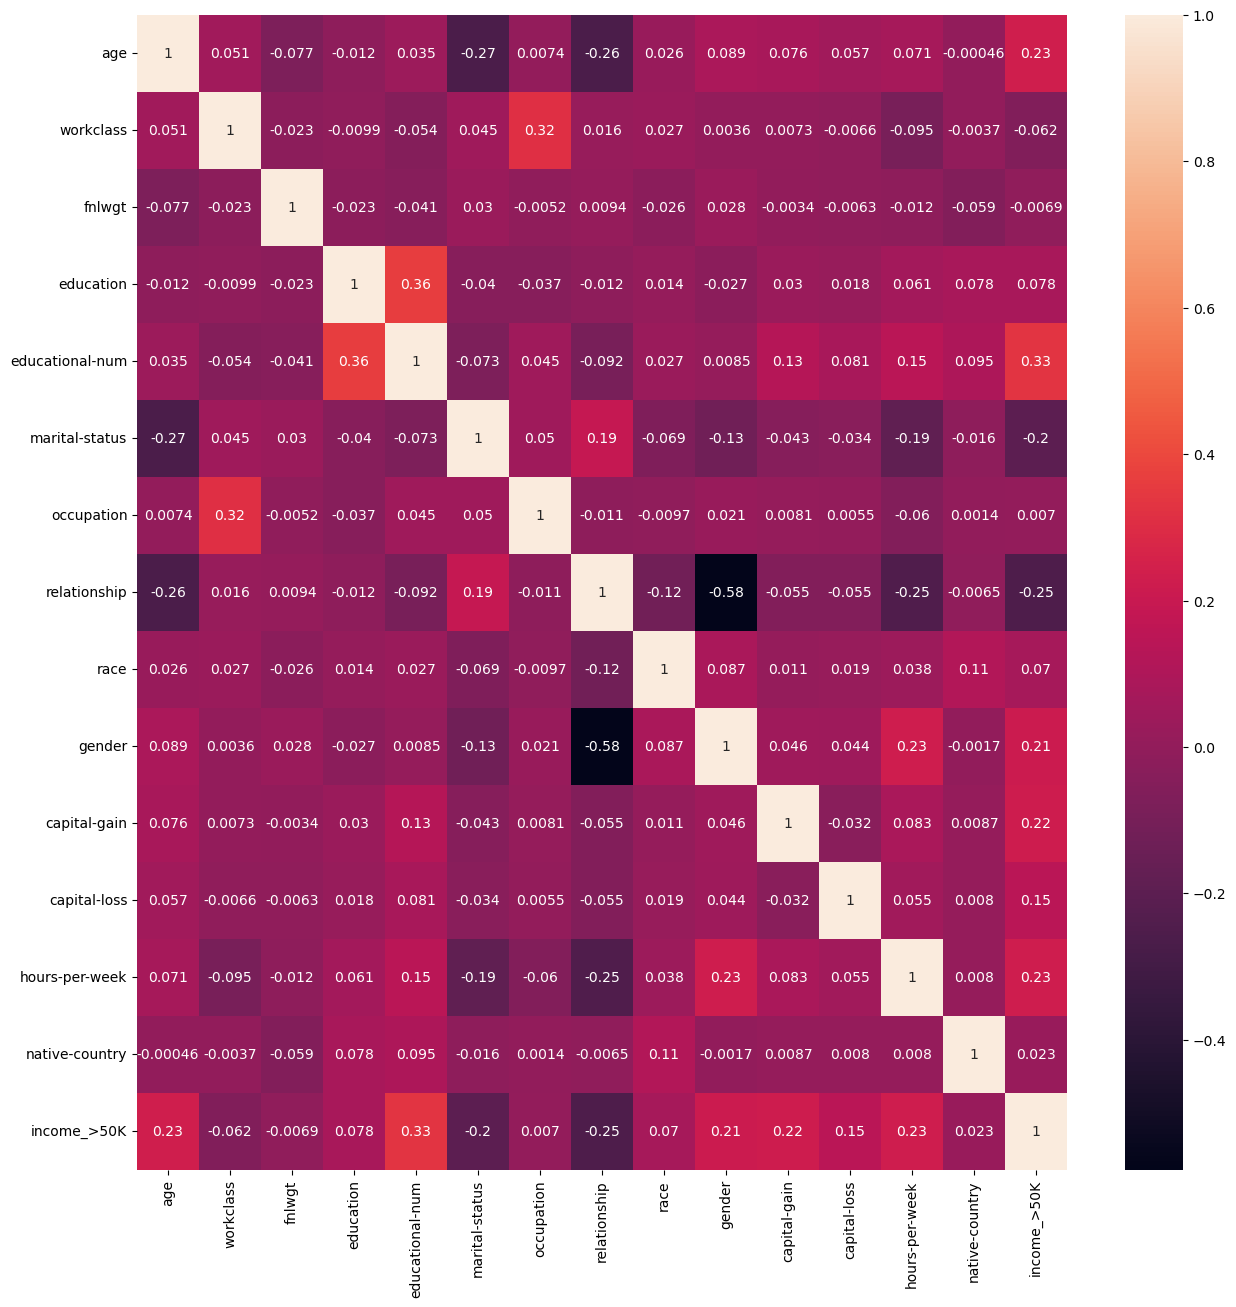

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(d.corr(),annot=True)

In [20]:
x=d[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'gender']]
x.shape

(43957, 14)

In [23]:
y=d['income_>50K']
y.shape

(43957,)

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm, y_sm = sm.fit_resample(x_train,y_train)

In [93]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 26783, 1: 8382})
SMOTE Classes Counter({0: 26783, 1: 26783})


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression() #clf is object
LR.fit(x_sm,y_sm)
y_pred=LR.predict(x_test)
y_probo=LR.predict_proba(x_test)
y_probo

array([[0.36767693, 0.63232307],
       [0.9765107 , 0.0234893 ],
       [0.57356568, 0.42643432],
       ...,
       [0.44186579, 0.55813421],
       [0.67196444, 0.32803556],
       [0.7095457 , 0.2904543 ]])

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [96]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[5107, 1549],
       [ 504, 1632]], dtype=int64)

In [97]:
recall=recall_score(y_test,y_pred)
recall

0.7640449438202247

In [98]:
score=accuracy_score(y_test,y_pred)
score

0.7664922656960873

In [99]:
precision=precision_score(y_test,y_pred)
precision

0.5130462118830557

In [100]:
f1=f1_score(y_test,y_pred)
f1

0.6138800075230393

## SupportVectorMachines

In [109]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_sm, y_sm)

SVC()

In [102]:
y_hat=svclassifier.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7927661510464058

In [105]:
y_test.shape

(8792,)

In [106]:
y_hat.shape

(8792,)

In [107]:
precision=precision_score(y_test,y_hat)
precision

0.5468097793679189

In [108]:
recall=recall_score(y_test,y_hat)
recall

0.8586142322097379